<h2> Problem Statement </h2>

* Build a model to answer: "What sorts of people were more likely to sruvive?"

In [2]:
%matplotlib inline

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

sns.set(style="whitegrid")

In [6]:
FILE_PATH_TRAIN = 'https://raw.githubusercontent.com/jay619/Kaggle-Competitions/main/1-Titanic/titanic/train.csv'
FILE_PATH_TEST = 'https://raw.githubusercontent.com/jay619/Kaggle-Competitions/main/1-Titanic/titanic/train.csv'

In [7]:
train = pd.read_csv(FILE_PATH_TRAIN)
test = pd.read_csv(FILE_PATH_TEST)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploratory Data Analysis (EDA)
The following process will be followed for EDA:
1. Single variable EDA
2. Pairwise EDA

#### Single variable EDA

##### PassengerId

This variable isn't really useful for any analysis and it doesn't provide any insight into the data. So, we'll skip this variable for now

##### Survived

This is a binary categorical variable where 0 = did *NOT* survive and 1 = did sruvive

In [35]:
train['Survived'].value_counts(normalize=True).sort_index()

0    0.616162
1    0.383838
Name: Survived, dtype: float64

Out of the 891 passengers, only 38% (342) survived. It would be interesting to see the survival rates by different age groups, sex and ticket class.

In [21]:
counts = train['Survived'].value_counts().sort_index()
counts

0    549
1    342
Name: Survived, dtype: int64

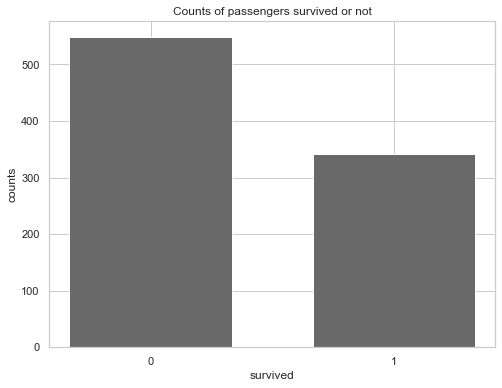

In [28]:
width = 1/1.5

figure = plt.figure(figsize=(8,6))

axes = figure.add_subplot(1,1,1)

axes.bar(range(len(counts)), counts, width, color="dimgray", align="center")
axes.set_xticks(range(len(counts)))
axes.set_title('Counts of passengers survived or not')
axes.set_xlabel('survived')
axes.set_ylabel('counts')
plt.show()
plt.close()

##### Pclass

This is the class of the ticket that passengers bought. 1 = 1st class, 2 = 2nd class and 3 = 3rd class. With 1st class being the most expensive or probably on the upper deck. I would assume that the survival rates for the 3rd class passengers should be very low since their deck got flooded the first.

In [39]:
# Checking to see if there are any NULLs
train['Pclass'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Pclass
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [43]:
counts = train['Pclass'].value_counts().sort_index()
counts

1    216
2    184
3    491
Name: Pclass, dtype: int64

In [42]:
train['Pclass'].value_counts(normalize=True).sort_index()

1    0.242424
2    0.206510
3    0.551066
Name: Pclass, dtype: float64

Majority of the passengers travelling had a 3rd class ticket, 55% to be precise. Followed by the 1st class with 24% and following 2nd class with 20%.

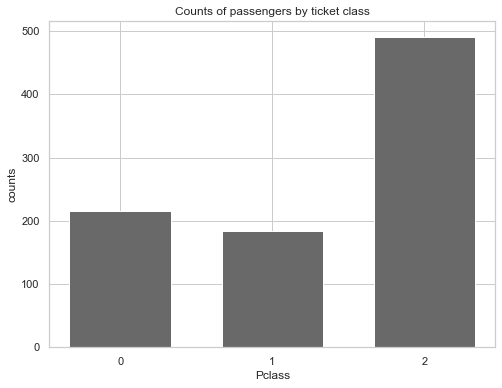

In [45]:
width = 1/1.5

figure = plt.figure(figsize=(8,6))

axes = figure.add_subplot(1,1,1)

axes.bar(range(len(counts)), counts, width, color="dimgray", align="center")
axes.set_xticks(range(len(counts)))
axes.set_title('Counts of passengers by ticket class')
axes.set_xlabel('Pclass')
axes.set_ylabel('counts')
plt.show()
plt.close()

##### Sex

In [49]:
train['Sex'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Sex
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [52]:
counts = train['Sex'].value_counts().sort_index()
counts

female    314
male      577
Name: Sex, dtype: int64

In [53]:
train['Sex'].value_counts(normalize=True).sort_index()

female    0.352413
male      0.647587
Name: Sex, dtype: float64

About 65% of the passengers were male. Who had the higher survival rate? Would be interesting to see the distribution of sex by the ticket class and their respective survival rates.

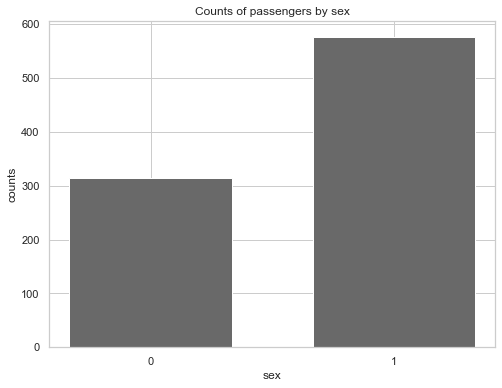

In [56]:
width = 1/1.5

figure = plt.figure(figsize=(8,6))

axes = figure.add_subplot(1,1,1)

axes.bar(range(len(counts)), counts, width, color="dimgray", align="center")
axes.set_xticks(range(len(counts)))
axes.set_title('Counts of passengers by sex')
axes.set_xlabel('sex')
axes.set_ylabel('counts')
plt.show()
plt.close()